In [7]:
%matplotlib inline

## Import dependencies

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Load dataset

In [9]:
df = pd.read_csv("./datasets/weatherHistory.csv")
df

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,0.89,14.1197,251,15.8263,0,1015.13
1,9.355556,0.86,14.2646,259,15.8263,0,1015.63
2,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,8.288889,0.83,14.1036,269,15.8263,0,1016.41
4,8.755556,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,21.522222,0.60,10.5294,20,16.1000,0,1015.95


### Identify the features required for the model

In [10]:
selected_features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']
selected_features

['Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

## Selecting the data from the whole dataset and classifying it in input and output

In [11]:
X = np.asarray(df[selected_features], dtype=np.float32)
y = np.asarray(df['Temperature (C)'], dtype=np.float32).reshape(-1, 1)
X, y

(array([[8.90000e-01, 1.41197e+01, 2.51000e+02, 1.58263e+01, 0.00000e+00,
         1.01513e+03],
        [8.60000e-01, 1.42646e+01, 2.59000e+02, 1.58263e+01, 0.00000e+00,
         1.01563e+03],
        [8.90000e-01, 3.92840e+00, 2.04000e+02, 1.49569e+01, 0.00000e+00,
         1.01594e+03],
        ...,
        [5.60000e-01, 8.98380e+00, 3.00000e+01, 1.61000e+01, 0.00000e+00,
         1.01566e+03],
        [6.00000e-01, 1.05294e+01, 2.00000e+01, 1.61000e+01, 0.00000e+00,
         1.01595e+03],
        [6.10000e-01, 5.87650e+00, 3.90000e+01, 1.55204e+01, 0.00000e+00,
         1.01616e+03]], dtype=float32),
 array([[ 9.472222],
        [ 9.355556],
        [ 9.377778],
        ...,
        [22.038889],
        [21.522223],
        [20.438889]], dtype=float32))

## Feature scaling

In [12]:
sc = StandardScaler()
X_data = sc.fit_transform(X)
y_data = sc.fit_transform(y)
X_data, y_data

(array([[ 0.7934703 ,  0.47863507,  0.591256  ,  1.3069757 ,  0.        ,
          0.10168522],
        [ 0.6399956 ,  0.49959385,  0.6657558 ,  1.3069757 ,  0.        ,
          0.10595984],
        [ 0.7934703 , -0.9954734 ,  0.15356982,  1.0995857 ,  0.        ,
          0.10861009],
        ...,
        [-0.8947533 , -0.2642411 , -1.4668003 ,  1.3722653 ,  0.        ,
          0.10621605],
        [-0.69012   , -0.04067966, -1.5599251 ,  1.3722653 ,  0.        ,
          0.10869566],
        [-0.63896173, -0.7136928 , -1.3829881 ,  1.2340052 ,  0.        ,
          0.11049067]], dtype=float32),
 array([[-0.25759903],
        [-0.2698135 ],
        [-0.2674869 ],
        ...,
        [ 1.0580761 ],
        [ 1.0039834 ],
        [ 0.8905631 ]], dtype=float32))

## Splitting data into training and testing data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

## Training the model using decision trees and Random Forest

In [51]:
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train, y_train.flatten())

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train.flatten())

RandomForestRegressor()

### Accuracy of decision tree algorithm

In [52]:
decisionTree.score(X_train, y_train.flatten())

0.9999634823466356

In [53]:
decisionTree.score(X_test, y_test.flatten())

0.36641281860489083

### Accuracy of random forest algorithm

In [54]:
randomForest.score(X_train, y_train.flatten())

0.954410522286043

In [55]:
randomForest.score(X_test, y_test.flatten())

0.6763084767662755

[[ 9.472222]
 [ 9.355556]
 [ 9.377778]
 ...
 [22.038889]
 [21.522223]
 [20.438889]]
[-2.42247224 -2.42247224 -2.42247224 ... -2.42247224 -2.42247224
 -2.42247224]
[-2.13704269 -2.13704269 -2.13704269 ... -2.37620822 -2.37620822
 -2.37620822]


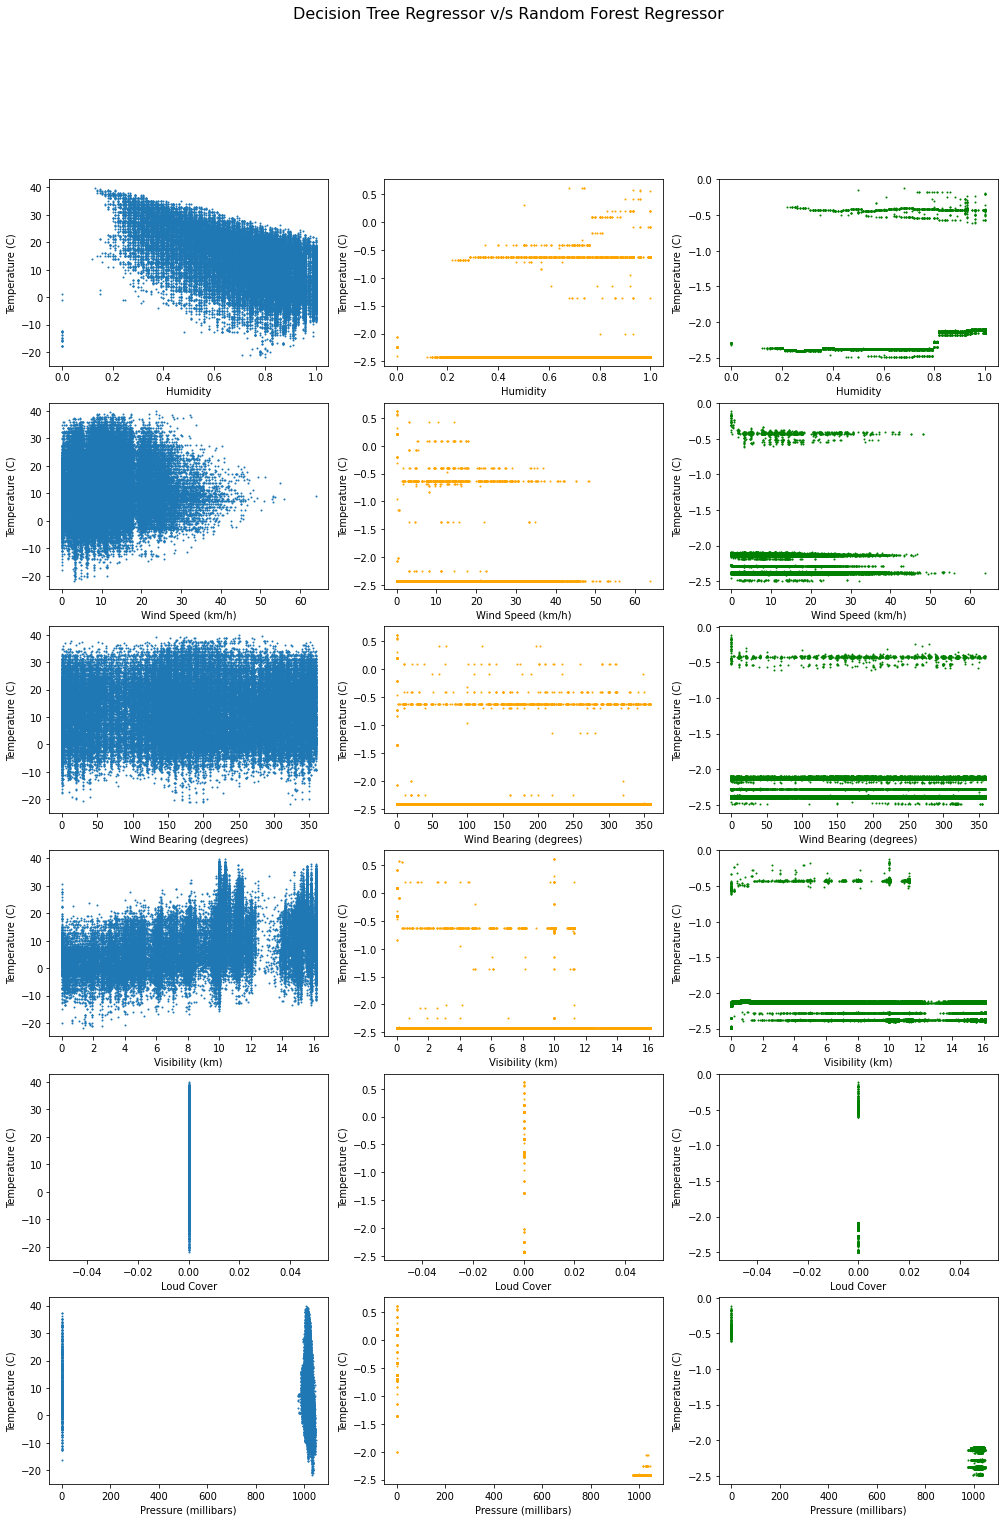

In [56]:
fig, axs = plt.subplots(6, 3)
fig.set_figwidth(17)
fig.set_figheight(24)
fig.set_facecolor("white")
fig.suptitle('Decision Tree Regressor v/s Random Forest Regressor', fontsize=16)
predicted_decision_tree = decisionTree.predict(X)
predicted_random_forest = randomForest.predict(X)
j = 0

print(y, predicted_decision_tree, predicted_random_forest, sep='\n')

for i in selected_features:
  axs[j,0].scatter(df[i], df['Temperature (C)'], s=1)
  axs[j,0].set(xlabel= i, ylabel = 'Temperature (C)')
  axs[j,1].scatter(df[i], predicted_decision_tree, color='orange', s=1)
  axs[j,1].set(xlabel= i, ylabel = 'Temperature (C)')
  axs[j,2].scatter(df[i], predicted_random_forest, color='green', s=1)
  axs[j,2].set(xlabel= i, ylabel = 'Temperature (C)')
  
  j += 1

plt.show()